In [1]:
import phate
import numpy as np
import pandas as pd
from sklearn.neighbors import NearestNeighbors
import scanpy as sc
import scvelo as scv
import phate
import numpy as np
import pandas as pd
from sklearn.neighbors import NearestNeighbors

In [2]:
adata = scv.datasets.pancreas()
scv.pp.filter_and_normalize(adata, min_shared_counts=20, n_top_genes=2000)
adata.layers["spliced_counts"] = adata.layers["spliced"].toarray()
adata.layers["unspliced_counts"] = adata.layers["unspliced"].toarray()
#scv.pp.moments(adata, n_neighbors=30)

Filtered out 20801 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 2000 highly variable genes.
Logarithmized X.


/mnt/data2/home/leonardo/miniconda3/envs/DeepTrajectory/lib/python3.11/site-packages/scvelo/preprocessing/utils.py:705: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  log1p(adata)


In [3]:
# Example: Generate synthetic or real single-cell data
# Replace this with your actual single-cell data matrix
# Rows = cells, Columns = genes
data = adata.layers["spliced_counts"]#.toarray()
#data = np.concatenate([adata.layers["unspliced_counts"], adata.layers["spliced_counts"]], axis=1)
# Step 1: Apply PHATE to Embed the Data
phate_operator = phate.PHATE(n_jobs=-1)  # Use all available cores for speed
phate_embedding = phate_operator.fit_transform(data)

# Step 2: Estimate Neighbors in PHATE Space
# Using k-Nearest Neighbors in the embedded PHATE space
n_neighbors = 10
knn = NearestNeighbors(n_neighbors=n_neighbors, algorithm='auto')
knn.fit(phate_embedding)

# Get neighbor indices and distances
distances, neighbors = knn.kneighbors(phate_embedding)


Calculating PHATE...
  Running PHATE on 3696 observations and 2000 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...


/mnt/data2/home/leonardo/miniconda3/envs/DeepTrajectory/lib/python3.11/site-packages/phate/phate.py:802: DeprecationWarning: Call to deprecated method info. (Use TaskLogger.log_info instead) -- Deprecated since version 1.1.0.
  _logger.info(


    Calculated PCA in 0.17 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.45 seconds.
    Calculating affinities...
    Calculated affinities in 0.03 seconds.
  Calculated graph and diffusion operator in 0.65 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 0.12 seconds.
    Calculating KMeans...
    Calculated KMeans in 0.85 seconds.
  Calculated landmark operator in 1.49 seconds.
  Calculating optimal t...
    Automatically selected t = 28
  Calculated optimal t in 0.62 seconds.
  Calculating diffusion potential...


/mnt/data2/home/leonardo/miniconda3/envs/DeepTrajectory/lib/python3.11/site-packages/phate/phate.py:1050: DeprecationWarning: Call to deprecated method info. (Use TaskLogger.log_info instead) -- Deprecated since version 1.1.0.
  _logger.info("Automatically selected t = {}".format(t_opt))


  Calculated diffusion potential in 0.27 seconds.
  Calculating metric MDS...


/mnt/data2/home/leonardo/miniconda3/envs/DeepTrajectory/lib/python3.11/site-packages/phate/mds.py:43: DeprecationWarning: Call to deprecated method debug. (Use TaskLogger.log_debug instead) -- Deprecated since version 1.1.0.
  _logger.debug(
/mnt/data2/home/leonardo/miniconda3/envs/DeepTrajectory/lib/python3.11/site-packages/phate/mds.py:80: DeprecationWarning: Call to deprecated method debug. (Use TaskLogger.log_debug instead) -- Deprecated since version 1.1.0.
  _logger.debug("Performing SGD MDS on " "{} of shape {}...".format(type(D), D.shape))


  Calculated metric MDS in 3.41 seconds.
Calculated PHATE in 6.44 seconds.


/mnt/data2/home/leonardo/miniconda3/envs/DeepTrajectory/lib/python3.11/site-packages/phate/phate.py:920: DeprecationWarning: Call to deprecated method debug. (Use TaskLogger.log_debug instead) -- Deprecated since version 1.1.0.
  _logger.debug("Extending to original data...")


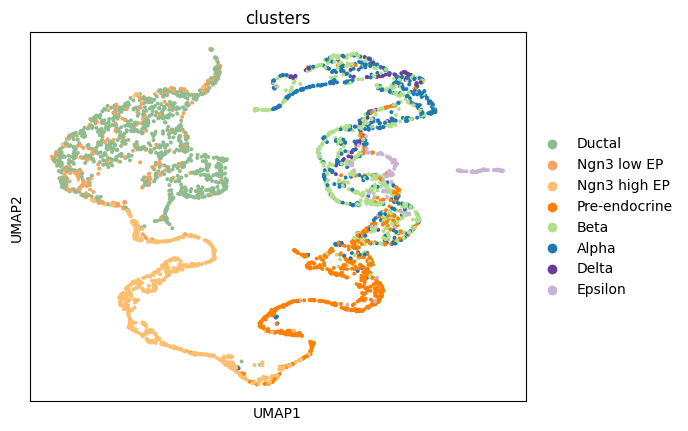

In [4]:
adata.obsm['X_phate'] = phate_embedding
sc.pp.neighbors(adata=adata, use_rep='X_phate')
sc.tl.umap(adata=adata)
sc.pl.umap(adata, color="clusters")

In [5]:
adata.X = adata.layers["spliced_counts"]

In [6]:
adata.X

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.8759722 , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.60370374, ..., 0.60370374, 0.60370374,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)